NOTE:
- In this notebook we will design the final encoding library based on the result from step 1 (i.e. target probe design) and step 2 (i.e. codebook design)

In [1]:
import sys,os,tqdm
import pickle
sys.path.append(os.path.dirname(os.getcwd()) + os.sep +'package_and_utils' + os.sep + 'LibraryDesign3')
import LibraryTools as lt
import numpy as np
import pandas as pd
import glob

#### 1. Load the codebook

In [2]:
code,expr,genes = pickle.load(open(os.path.dirname(os.getcwd()) + os.sep + 'design_outputs' + os.sep + 'code__human_Basalganglia_675gn_MERFISH_Panel_final.pkl','rb'))


In [3]:
code.shape

(673, 28)

- code = codebook
- expr = expression level of the genes 
- genes = list of genes we want to design

We will be using Readout sequence used for designing the XXBB library:
- Adapters_Bits1_96_oligos_20221102. This file contains the sequence for the adaptor probes. i.e. revese-complement of readout sequence + 2x (reverse complete of readout probe)

           - for example, 'tagaaatatccgagtggcatTTTGCACTGCCGTCCTTGACTTTGCACTGCCGTCCTTGAC' = 'tagaaatatccgagtggcat' + 'TTTGCACTGCCGTCCTTGAC' + 'TTTGCACTGCCGTCCTTGAC'
  
           - so the first 20 sequence are for the readout-sequence and the rest is for the tail that will hold the readout probe


In [4]:
# namesR = ['NDB_1039','NDB_503','NDB_876','NDB_562','NDB_413',
#           'NDB_423','NDB_796','NDB_806','NDB_393','NDB_1051',
#           'NDB_650','NDB_882','NDB_922','NDB_383','NDB_429',
#           'NDB_772','NDB_407','NDB_783','NDB_460','NDB_635',
#           'NDB_573','NDB_592','NDB_1013','NDB_480','NDB_871',
#           'NDB_995','NDB_774']
# namesR = np.array(namesR)
# seqsR = ['tatccggcctcgtattgaat','ttcgtcttaccgcgagtctt','acgcaacattctcgcgttgg','aatgtacgtggactcgcatg',
#         'tagcgtcccaacatctagtt','aatctgcgcgctgatcgtaa','tatgcattcccgcacgtttg','gctatacgctatctatccag',
#          'tcattcgcttacgctgtctg', 'caggtccgggtgtttcgtat','ttagtaaccgcgagcaccgt','ttgataccaccgtctgggat',
#          'tcggttatgcgcgtgtattc','ttaagttgtttctcgccggg','tcgccttgcaacgactagtg','aggccactaccgggctttag',
#          'agctacgctctgacacggga','atatgcccgcgcaaggttgg','atgcacgtcatcgtgtgtgg','tatcgcggtaacctgtaaag',
#          'gaacattagtcgactccacg','gttacgttatcggattctcc','gacgtccgtttgtctgatgc','tgactcgtagcgcaagtggt',
#          'tgatgacgctgagggccgat','atttagtctacgggcgtcgt','tcaaccacgggcgttgtgag']
# seqsR = [lt.seqrc(sq) for sq in seqsR]
# seqsR = np.array(seqsR)

In [4]:
# namesR = ['NDB_727','NDB_776','NDB_666','NDB_904','NDB_629','NDB_891','NDB_601','NDB_785' ,'NDB_522','NDB_1048','NDB_920','NDB_729','NDB_649','NDB_362',
#           'NDB_873','NDB_928','NDB_902','NDB_645','NDB_691','NDB_329','NDB_732','NDB_976','NDB_488','NDB_960','NDB_1072','NDB_416','NDB_561']
# namesR = np.array(namesR)

# seqsR = ['gctacgtccgcggccaatag','gtagcttcgcgtgaacgaat',
#          'ggtgtggtcctcgcgtgcag','caaacttgcgaataggcgat',
#          'ggtaagcggtacgtcctgtc','atcaatatctcgattaagtc',
#          'atcgcttgcatacttacttc', 'aaatcggatgatccgaccta', 
#          'caccgataagacggcttggc','cctgccgttcagttaaagaa',
#          'ggtgcggtaatctgtccatc','aatgggccatgacgccttca',
#          'gtcgtcctatcttcacaaga','atagacccggcacttcgcag',
#          'gactatctctcgttcatagc','tatcaattcggcacgagggt',
#          'gcccttatgtcaacgagccg','gttacgaacaggtggtacac',
#          'caatgcgctaggttgacacc','atgttagtcgccgtcggcat',
#          'gggtctttcgagttctactg' ,'ttcgacttgctcggcacggt',
#          'cgattcggtacttagcctgg','tgcaaacgtgtatacccggc',
#          'ttactccgggtcaccaagtg' ,'ttgtcacccgtcgtgttccg',
#          'cgtcacgctcgttcgaatgc']
# seqsR = [lt.seqrc(sq) for sq in seqsR]
# seqsR = np.array(seqsR)
readOut_seq = pd.read_csv(os.path.dirname(os.getcwd()) + os.sep + 'HumanGenomeTranscriptome' + os.sep + 'XXBB_Adapters_Bits1_96_oligos_20221102.csv').iloc[:96,:]
seqsR = [lt.seqrc(x[:20]) for x in readOut_seq['SEQUENCE'].values]
namesR = ['_'.join(x.split('_')[1:3]) for x in readOut_seq['NAME'].values]
namesR[:10], seqsR[:10]

(['NDB_784',
  'NDB_755',
  'NDB_759',
  'NDB_826',
  'NDB_578',
  'NDB_795',
  'NDB_376',
  'NDB_713',
  'NDB_777',
  'NDB_865'],
 ['atgccactcggatatttcta',
  'gcctagcataacatgtcgca',
  'ccgagagtcaacgacagtca',
  'gtctaaggacatcgacatat',
  'acgcctctcatgtatcgcct',
  'caaacgtgtaacagacgccc',
  'atcaacgtacccacaaagtc',
  'ttcggaaagtgacaaccacc',
  'taacgaaagcaaattcgccg',
  'tcacatatccgaccgggatc'])

##### Assign readout sequence for each genes based on the binary sequence in the codebook

- For these cell type marker library, we are using the first 25 readout sequence from pool of adaptor probes used for mouse.
-  the primer are 'W1B03' and 'W1A04',

Note: the following primer have been used before  for other library
- 'W1B03' and 'W1B02' -- used for marmosest library
- ' ' and ' ' -- used for Maize's library

In [8]:
import numpy as np,glob
A,B='W1B03','W1A04'
dic_pcr = {'W1A01': 'CGGCTCGCAGCGTGTAAACG', 'W1A02': 'TAATACGACTCACTATAGGGCATTTCAGGATCACCGGCGG', 'W1A03': 'CCCGCAATGGCTGACAACCG', 'W1A04': 'TAATACGACTCACTATAGGGCGTTGTATGCCCTCCACGC', 'W1A05': 'CATTCAGCATTGCGCAACGG', 'W1A06': 'TAATACGACTCACTATAGGGTCTTCCCGCAAATGCACCG', 'W1A07': 'CGCAAACTGGTGCGGAAGGC', 'W1A08': 'TAATACGACTCACTATAGGGCCCTTTCGCGCTGCATCGAC', 'W1A09': 'TTGTTGAGGCGGCGGAAGTC', 'W1A10': 'TAATACGACTCACTATAGGGATTGCCGCATGGTTTCCG', 'W1A11': 'TTGCTAGCGTGGGCCAATCG', 'W1A12': 'TAATACGACTCACTATAGGGCCATTGCCCGCGAGGTCGAG', 'W1B01': 'TTGGGCGTGCACGTCAATTC', 'W1B02': 'TAATACGACTCACTATAGGGCAATTAATCGCCCGGTGCCA', 'W1B03': 'GACATCCAGGCGCGGACAAC', 'W1B04': 'TAATACGACTCACTATAGGGCTTGTGCATCGCGCCAAAGA', 'W1B05': 'CGGGTTTCGTTGCGCACACC', 'W1B06': 'TAATACGACTCACTATAGGGCCTGTGCGGAAATCGCGAGA', 'W1B07': 'CACGTGGCCTCTCGCACATC', 'W1B08': 'TAATACGACTCACTATAGGGCATGTGTCACCGCTCCGTGG', 'W1B09': 'TAGGCGTGTCGGCCAACCAG', 'W1B10': 'TAATACGACTCACTATAGGGCGGGTCGATCATCGGCTTTG', 'W1B11': 'TTGGACCGAGCCAGTACCGC', 'W1B12': 'TAATACGACTCACTATAGGGCAGGTTGGCCGCGACTTCTG'}

lib_names,lib_seqs = [],[]
def read_target_seqs(fl):
    if os.path.exists(fl):
        txts = np.array([ln.replace('\n','').split(',') for ln in open(fl,'r') if len(ln)>2][1:])
        seqs = np.array([txt.replace("'",'')[1:] for txt in txts[:,0]])
        names = txts[:,1]
        return names,seqs
    else:
        return [],[]

probe_fld = 'ProbesRNA_HumanBasalGangliaAllen690'
fls = glob.glob(os.path.dirname(os.getcwd()) + os.sep + 'design_outputs' + os.sep + f'{probe_fld}' + os.sep + '*.csv')

# USE namesR and seqsR defined above
readOut_seq = pd.read_csv(os.path.dirname(os.getcwd()) + os.sep + 'HumanGenomeTranscriptome' + os.sep + 'XXBB_Adapters_Bits1_96_oligos_20221102.csv').iloc[:96,:]
seqsR = [lt.seqrc(x[:20]) for x in readOut_seq['SEQUENCE'].values]
namesR = ['_'.join(x.split('_')[1:3]) for x in readOut_seq['NAME'].values]

ngns,nbits = code.shape
start_row = 0
namesR,seqsR=np.array(namesR[start_row:start_row + nbits]),np.array(seqsR[start_row:start_row + nbits]) # pick the first 'nbits' number of readout probes along with their name and sequence
dic_R = dict(zip(namesR,seqsR)) # make them into a dictionary 
# # code.shape

dic_readouts = {gn:namesR[np.where(cd)[0]] for gn,cd in zip(genes,code)} # for each genes, from the total 'nbits' readout probes, pick the readout probe corresponding to the onbits


In [9]:
np.array(list(dic_readouts.keys())).shape,np.array(list(dic_readouts.keys()))

((673,),
 array(['ABCA8', 'ABCG2', 'ABI3BP', 'ABO', 'ACOXL', 'ACTA2', 'ACVR1C',
        'ADAM12', 'ADAM2', 'ADAM23', 'ADAM28', 'ADAMTS17', 'ADAMTS18',
        'ADAMTS2', 'ADAMTS20', 'ADAMTS9', 'ADAMTSL1', 'ADAMTSL3', 'ADARB2',
        'ADCYAP1', 'ADGB', 'ADGRD1', 'ADGRF5', 'ADGRG6', 'ADGRL4',
        'ADGRV1', 'ADM', 'ADRA1B', 'AEBP1', 'AGBL1', 'ALCAM', 'ALDH1A1',
        'AMIGO2', 'ANGPT1', 'ANLN', 'ANO2', 'APBB1IP', 'APOD', 'APOE',
        'AQP1', 'AQP4', 'ARHGAP10', 'ARHGAP15', 'ATP10A', 'ATP10B',
        'ATP2A3', 'ATP8B4', 'BAIAP3', 'BCAN', 'BCAS1', 'BCL11B', 'BEND7',
        'BEST3', 'BICC1', 'BLM', 'BLNK', 'BMPR1B', 'BNC2', 'BTNL9',
        'C10orf90', 'C11orf96', 'C1QL1', 'C1QL3', 'C3', 'C4orf19', 'C7',
        'CA8', 'CACNG5', 'CADM1', 'CADPS2', 'CALB1', 'CALB2', 'CALCRL',
        'CASR', 'CAV1', 'CAV2', 'CBLN1', 'CBLN2', 'CBLN4', 'CCBE1',
        'CCDC178', 'CCDC196', 'CCK', 'CD163', 'CD247', 'CD36', 'CD3D',
        'CD44', 'CD96', 'CDH23', 'CDH8', 'CDH9', 'CDK15', 'CDK18', '

In [10]:
dic_readouts

{'ABCA8': array(['NDB_755', 'NDB_533', 'NDB_743', 'NDB_643'], dtype='<U7'),
 'ABCG2': array(['NDB_533', 'NDB_718', 'NDB_699', 'NDB_456'], dtype='<U7'),
 'ABI3BP': array(['NDB_777', 'NDB_817', 'NDB_725', 'NDB_971'], dtype='<U7'),
 'ABO': array(['NDB_817', 'NDB_690', 'NDB_743', 'NDB_683'], dtype='<U7'),
 'ACOXL': array(['NDB_826', 'NDB_652', 'NDB_936', 'NDB_643'], dtype='<U7'),
 'ACTA2': array(['NDB_826', 'NDB_795', 'NDB_713', 'NDB_760'], dtype='<U7'),
 'ACVR1C': array(['NDB_826', 'NDB_652', 'NDB_718', 'NDB_683'], dtype='<U7'),
 'ADAM12': array(['NDB_784', 'NDB_865', 'NDB_847', 'NDB_936'], dtype='<U7'),
 'ADAM2': array(['NDB_725', 'NDB_807', 'NDB_652', 'NDB_760'], dtype='<U7'),
 'ADAM23': array(['NDB_801', 'NDB_718', 'NDB_699', 'NDB_643'], dtype='<U7'),
 'ADAM28': array(['NDB_826', 'NDB_578', 'NDB_817', 'NDB_725'], dtype='<U7'),
 'ADAMTS17': array(['NDB_817', 'NDB_725', 'NDB_718', 'NDB_760'], dtype='<U7'),
 'ADAMTS18': array(['NDB_826', 'NDB_795', 'NDB_777', 'NDB_652'], dtype='<U7'),
 'A

#### Based on the readout sequence prepare the adaptor probes

- This will be the same as the the adpator sequence in the file 'Adapters_Bits1_96_oligos_20221102.csv'

In [11]:
tails = ['TTTGCACTGCCGTCCTTGACTTTGCACTGCCGTCCTTGAC','GATCCGATTGGAACCGTCCCGATCCGATTGGAACCGTCCC','TGCGAACTGTCCGGCTTTCATGCGAACTGTCCGGCTTTCA'] # the tails are listed here based on the order of the colors cy3,cy5,750
adaptor_probes = {} # name:seq for adaptor probes
for isq,(nm,sq) in enumerate(zip(namesR,seqsR)):
    adaptor_probes[f'Human_cellTypeMarker_'+nm] = lt.seqrc(sq)+tails[isq%len(tails)]
    print(f'Human_cellTypeMarker_'+nm + '\t' + adaptor_probes[f'Human_cellTypeMarker_'+nm])


Human_cellTypeMarker_NDB_784	tagaaatatccgagtggcatTTTGCACTGCCGTCCTTGACTTTGCACTGCCGTCCTTGAC
Human_cellTypeMarker_NDB_755	tgcgacatgttatgctaggcGATCCGATTGGAACCGTCCCGATCCGATTGGAACCGTCCC
Human_cellTypeMarker_NDB_759	tgactgtcgttgactctcggTGCGAACTGTCCGGCTTTCATGCGAACTGTCCGGCTTTCA
Human_cellTypeMarker_NDB_826	atatgtcgatgtccttagacTTTGCACTGCCGTCCTTGACTTTGCACTGCCGTCCTTGAC
Human_cellTypeMarker_NDB_578	aggcgatacatgagaggcgtGATCCGATTGGAACCGTCCCGATCCGATTGGAACCGTCCC
Human_cellTypeMarker_NDB_795	gggcgtctgttacacgtttgTGCGAACTGTCCGGCTTTCATGCGAACTGTCCGGCTTTCA
Human_cellTypeMarker_NDB_376	gactttgtgggtacgttgatTTTGCACTGCCGTCCTTGACTTTGCACTGCCGTCCTTGAC
Human_cellTypeMarker_NDB_713	ggtggttgtcactttccgaaGATCCGATTGGAACCGTCCCGATCCGATTGGAACCGTCCC
Human_cellTypeMarker_NDB_777	cggcgaatttgctttcgttaTGCGAACTGTCCGGCTTTCATGCGAACTGTCCGGCTTTCA
Human_cellTypeMarker_NDB_865	gatcccggtcggatatgtgaTTTGCACTGCCGTCCTTGACTTTGCACTGCCGTCCTTGAC
Human_cellTypeMarker_NDB_533	gtcggctgcgtactggtacaGATCCGATTGGAACCGTCCCGATCCGATTGGAACCGTCCC
Human_cell

In [12]:
### check they are identical 
assertion_log = []
for ad_probe in adaptor_probes:
    used_ad_probe_seq = adaptor_probes[ad_probe]
    used_ad_probe_nm = ad_probe.split('Human_cellTypeMarker_')[-1]
    
    idx = np.array([used_ad_probe_nm in '_'.join(x.split('_')[1:3]) for x in readOut_seq.iloc[start_row: start_row + nbits,:]['NAME'].values])
    expected_ad_probe_seq = readOut_seq.iloc[start_row: start_row + nbits,:]['SEQUENCE'].values[idx]
    assertion_log.append(expected_ad_probe_seq == used_ad_probe_seq)
print(f'the used and avialable adaptor probes match?: {np.all(assertion_log)}')    
# np.all([x in set(list(adaptor_probes.values())) for x in readOut_seq.iloc[start_row: start_row + nbits,:]['SEQUENCE'].values])


                

the used and avialable adaptor probes match?: True


In [11]:
# keep record of the adaptor probe:
np.save(os.path.dirname(os.getcwd()) + os.sep + 'design_outputs' + os.sep + 'adaptorProbe__human_Basalganglia_675gn_MERFISH_Panel_final.pkl',adaptor_probes, allow_pickle = True)

#### get the distribution(number) of target probes for each genes 

In [13]:
dic_fl = {os.path.basename(fl).split('_')[0]:fl for fl in fls if 'exons' in os.path.basename(fl)}
#[gn for gn in genes if gn not in dic_fl]
from tqdm import tqdm
nprobes = []
for gn in tqdm(genes):
    names,seqs = read_target_seqs(dic_fl.get(gn,"None")) # potential target sequence and its name 
    nprobes.append(len(names)) # record the total number of target sequence for each gene

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 673/673 [00:18<00:00, 36.23it/s]


In [14]:
len(genes)

673

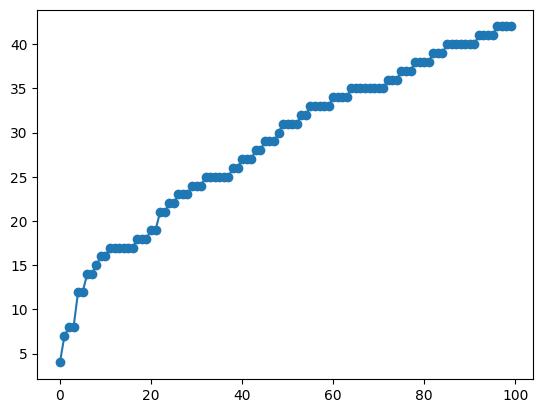

In [15]:
import matplotlib.pylab as plt
plt.plot(np.sort(nprobes)[:100],'o-')

In [16]:
np.median(nprobes) # median number of probes

81.0

#### Construct the final encoding probe sequence 

- construct the encoding probe sequence using the target sequence and the readout sequence. we will be using hybrid approach that will allow us to do MERFISH + single molecule FISH (which will help to comfirm the probes) 
- Encoding probe sequence = primerA_readoutSequence1_target_sequence_readoutSequence2_readoutSequence3_readoutSequence4_primerB
- readoutSequence4 will be read through  sm-FISH and the rest will be image using MERFISH

In [17]:
import itertools

# for the smFISH, we will be using the adaptor probes from mouse XBB library

cnames,cseqs = lt.fastaread(os.path.dirname(os.getcwd()) + os.sep + 'HumanGenomeTranscriptome' + os.sep + r'final_candidate_readouts_human.fasta')
cnames_,cseqs_= np.array(cnames)[1600:2300],np.array(cseqs)[1600:2300]


primerAnm,primerA,primerBnm,primerB,tag_lib = A,dic_pcr[A],B,lt.seqrc(dic_pcr[B][-20:]),'HumanBG_675_cellTypeMarker'

lib_names,lib_seqs = [],[]
lib_rdp_permutIdx = []  # this is to keep track of the idx of the MERFISH and sm-FISH readout-seq after permutation

for ign,gn in tqdm(enumerate(genes),desc = 'get the encoding probe sequence',total = len(genes)):
    
    # get the name and sequence for all target probes associated with the current gene
    names,seqs = read_target_seqs(dic_fl.get(gn,"None"))
    
    if len(seqs)<10:
        print(gn,len(names))
              
    else:         
        nmax = 150 # include as many probes, make adjustment for pricing      
        names = names[:nmax] # Select the first nmax potential target sequence, the more encoding porbes used, the better the signal.
        seqs = seqs[:nmax]
        ndb_nms = dic_readouts[gn] # get name of the readout sequence assigned to the gn based on the idx of its on-bits
                    
        # select the additional readout sequence to be used for sm-FISH
        cname_gn = cnames_[ign] 
        cseq_gn = cseqs_[ign]
        
        ndb_nms_all = list(itertools.combinations(ndb_nms,3)) # get all possible 3 combination of the 4 readout sequence  for that gene        
  
        for isq,(nm,sq) in enumerate(zip(names,seqs)):
            ndb_nms_ = ndb_nms_all[isq%len(ndb_nms_all)] # out of all the possible 3 combinations of readout probe select(cyclcally) 1 combination of readout probe names
            ndb_sqs_ = [dic_R[nm] for nm in ndb_nms_] #  get the sequence for the selected combination of readout probe names
            
            nmsRf = list(ndb_nms_) + [cname_gn] # append the name of the  additional 4th readout sequence 
            sqsRf = list(ndb_sqs_) + [cseq_gn]  # append the seq of the  additional 4th readout sequence 
            
            indR = np.random.permutation(np.arange(len(nmsRf))) # do permutation of the 4 readout sequence [why is this permutation neccessary?]
            lib_rdp_permutIdx.append(indR) # keep record of the permutation idx
            
            sqR1,sqR2,sqR3,sqR4 = [sqsRf[i_] for i_ in indR] # get the readout sequence after permutation
            nmR1,nmR2,nmR3,nmR4 = [nmsRf[i_] for i_ in indR]
            sq_ = lt.up_down([primerA,sqR1,sqR2,lt.seqrc(sq),sqR3,sqR4,primerB]) # assemble the encoding probe
            lib_seqs.append(sq_)
            nmR__ = '__'.join([nm__.split('_-2x')[0]for nm__ in nmsRf])
            nm_ = tag_lib + '__'+ primerAnm + '--' + primerBnm + '__' + nmR__ + '__' + nm
            lib_names.append(nm_)
print("Number of probes:",len(lib_names))
lt.fastawrite(os.path.dirname(os.getcwd()) + os.sep + 'design_outputs' + os.sep + 'human_Basalganglia_675gn_MERFISH_Panel_final.fasta',lib_names,lib_seqs)

get the encoding probe sequence:  33%|███████████████████████████████████████████▏                                                                                     | 225/673 [00:05<00:11, 39.30it/s]

FTH1 7


get the encoding probe sequence:  54%|█████████████████████████████████████████████████████████████████████▏                                                           | 361/673 [00:08<00:07, 41.27it/s]

MT-ND4L 4


get the encoding probe sequence:  68%|████████████████████████████████████████████████████████████████████████████████████████▏                                        | 460/673 [00:11<00:04, 44.58it/s]

PRSS3 8


get the encoding probe sequence:  89%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏              | 596/673 [00:14<00:01, 44.90it/s]

STRIT1 8


get the encoding probe sequence: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 673/673 [00:16<00:00, 41.42it/s]

Number of probes: 57913


- Note: the following genes have target probe of length 10, FTH1, MT-ND4L, PRSS3, and STRIT1.

#### Save the readout probes used for the single molecule FISH so that we can prepare adaptor for them 

In [21]:
smFISH_readout = {}
for ign,gn in tqdm(enumerate(genes)):
       smFISH_readout[gn] = (cnames_[ign],cseqs_[ign])

673it [00:00, 682817.27it/s]


In [23]:
np.save(os.path.dirname(os.getcwd()) + os.sep + 'design_outputs' + os.sep + 'smFISH_readout__human_Basalganglia_675gn_MERFISH_Panel_final.pkl',smFISH_readout,allow_pickle = True)
smFISH_readout

{'ABCA8': ('bcm_9765', 'TGCGAACTATCTCACGCTTG'),
 'ABCG2': ('bcm_9766', 'TTTGTGCGACGATGAACTCC'),
 'ABI3BP': ('bcm_9769', 'AAATCCGGGTTCGCTCCAAT'),
 'ABO': ('bcm_9773', 'AAACGACCCTGATAGCGACT'),
 'ACOXL': ('bcm_9791', 'TTCGACAGAGCGTACCACCT'),
 'ACTA2': ('bcm_9811', 'AACAACTATCGCGGCAGGGA'),
 'ACVR1C': ('bcm_9813', 'CTAGAGGTCGTGAAACAGGC'),
 'ADAM12': ('bcm_9824', 'AATAACGAGGCACCTATCTG'),
 'ADAM2': ('bcm_9826', 'TAGTACTACACGCCTCGGAT'),
 'ADAM23': ('bcm_9829', 'GTGATGATGCTCGACCCTAT'),
 'ADAM28': ('bcm_9840', 'CCTGATAGACACGATCCACT'),
 'ADAMTS17': ('bcm_9863', 'AAGTCCGTAGGTCGCCTTAC'),
 'ADAMTS18': ('bcm_9868', 'TCAGGGTACTCGCTTATGCA'),
 'ADAMTS2': ('bcm_9875', 'GGTACGATACTCGATTGGAC'),
 'ADAMTS20': ('bcm_9879', 'ATCAAGGCTATCGGTTGCTT'),
 'ADAMTS9': ('bcm_9884', 'TGATATAGCTTGCGAGTCCC'),
 'ADAMTSL1': ('bcm_9892', 'GTCGTTACGGCCTCTAAATT'),
 'ADAMTSL3': ('bcm_9905', 'CGTAGTTTATCGGCGGCTCT'),
 'ADARB2': ('bcm_9909', 'TATTCGGTTCTCCGCCACAT'),
 'ADCYAP1': ('bcm_9910', 'CCCAGCGCGAATACTCACTT'),
 'ADGB': ('bcm_

#### *old version of code for assemblying the encoding probe*

In [17]:

# lib_names,lib_seqs=[],[]
# from itertools import combinations
# for gn in tqdm(genes,desc = 'get the encoding probe sequence'):
#     names,seqs = read_target_seqs(dic_fl.get(gn,"None"))
#     nmax = 68
#     if len(seqs)>10:
#         names = names[:nmax] # Select the first 68 potential target sequence, is choice of 68 emprical?
#         seqs = seqs[:nmax]
#         ndb_nms = dic_readouts[gn] 
        
#         #ndb_sqs = [lt.seqrc('atatctcccgtcgcataaac')]#list(dic_readouts[gn_name])[:1]
#         #ndb_nms = ['Acrbcm_39946']#[dic_readouts_nm[nmR] for nmR in ndb_sqs]
        
#         ndb_nms_all = list(combinations(ndb_nms,3)) # get all possible 3 combination of the 4 readoutprobes for that gene
#         primerAnm,primerA,primerBnm,primerB,tag_lib =A,dic_pcr[A],B,lt.seqrc(dic_pcr[B][-20:]),'Marmoset_500InhMarker'
#         for isq,(nm,sq) in enumerate(zip(names,seqs)):
#             ndb_nms_ = ndb_nms_all[isq%len(ndb_nms_all)] # out of all the possible 3 combinations of readouprobe select(cyclcally) 1 combination of readout probe names
#             ndb_sqs_ = [dic_R[nm]for nm in ndb_nms_] #  get the sequence for the selected combinatin of readout probe names
#             tag = tag_lib+'__'+A+'__'+B+'__'+'__'.join(ndb_nms_)+'__' # tag name for the encoding probe,  tag + primerA + primerB + readoutseq1+ readoutseq2 + readoutseq3
#             ndb_sq1,ndb_sq2,ndb_sq3 = ndb_sqs_
#             sq_ = lt.up_down([primerA,ndb_sq1,lt.seqrc(sq),ndb_sq2,ndb_sq3,primerB]) # concatenate  the sequences to get the encoding probe sequence
#             nm_ = tag+nm # append the gene to the tag
#             lib_names.append(nm_)
#             lib_seqs.append(sq_)

In [18]:
np.array(lib_names),np.array(lib_seqs)

(array(['HumanBG_675_cellTypeMarker__W1B03--W1A04__NDB_755__NDB_533__NDB_743__bcm_9765__ABCA8_exons_pb_57',
        'HumanBG_675_cellTypeMarker__W1B03--W1A04__NDB_755__NDB_533__NDB_643__bcm_9765__ABCA8_exons_pb_98',
        'HumanBG_675_cellTypeMarker__W1B03--W1A04__NDB_755__NDB_743__NDB_643__bcm_9765__ABCA8_exons_pb_340',
        ...,
        'HumanBG_675_cellTypeMarker__W1B03--W1A04__NDB_784__NDB_533__NDB_971__bcm_13230__ZFPM2_exons_pb_4691',
        'HumanBG_675_cellTypeMarker__W1B03--W1A04__NDB_578__NDB_533__NDB_971__bcm_13230__ZFPM2_exons_pb_4739',
        'HumanBG_675_cellTypeMarker__W1B03--W1A04__NDB_784__NDB_578__NDB_533__bcm_13230__ZFPM2_exons_pb_4825'],
       dtype='<U104'),
 array(['GACATCCAGGCGCGGACAACgcctagcataacatgtcgcaTGCGAACTATCTCACGCTTGattttctcctggtctctaccatgtatctagaatttgctttGACGCGGCACACCTTGATCGtgtaccagtacgcagccgacGCGTGGAGGGCATACAACGC',
        'GACATCCAGGCGCGGACAACtgcgaactatctcacgcttgTGTACCAGTACGCAGCCGACgtttatccactgagctccttgtttagaagaaagttattcaGCAAGGTAACAGGTCGTTCGgcct

##### prepare dictionary that has all readout sequences used for each gene. 

Note: For each gene  we have multiple target sequence => multiple encoding probe => multiple combination of the 4 readout sequence

In [20]:
print(len(lib_seqs),np.unique([len(sq) for sq in lib_seqs]))
dic_probes = {}
for nm,sq,permute_idx in zip(lib_names,lib_seqs,lib_rdp_permutIdx):
    nmgn = nm.split('__')[-1].split('_')[0]
    a,r1,r2,t,r3,r4,b = lt.up_down_split(sq) # Note: r1,r2 and r3 are the adaptor probes (i.e. sequence complementry to the adaptor probe)
    r1,r2,r3 = np.array([r1,r2,r3,r4])[permute_idx<3]
    dic_probes[nmgn]=dic_probes.get(nmgn,[])+[r1.upper(),r2.upper(),r3.upper()]

57913 [160]


In [21]:
dic_probes.keys()

dict_keys(['ABCA8', 'ABCG2', 'ABI3BP', 'ABO', 'ACOXL', 'ACTA2', 'ACVR1C', 'ADAM12', 'ADAM2', 'ADAM23', 'ADAM28', 'ADAMTS17', 'ADAMTS18', 'ADAMTS2', 'ADAMTS20', 'ADAMTS9', 'ADAMTSL1', 'ADAMTSL3', 'ADARB2', 'ADCYAP1', 'ADGB', 'ADGRD1', 'ADGRF5', 'ADGRG6', 'ADGRL4', 'ADGRV1', 'ADM', 'ADRA1B', 'AEBP1', 'AGBL1', 'ALCAM', 'ALDH1A1', 'AMIGO2', 'ANGPT1', 'ANLN', 'ANO2', 'APBB1IP', 'APOD', 'APOE', 'AQP1', 'AQP4', 'ARHGAP10', 'ARHGAP15', 'ATP10A', 'ATP10B', 'ATP2A3', 'ATP8B4', 'BAIAP3', 'BCAN', 'BCAS1', 'BCL11B', 'BEND7', 'BEST3', 'BICC1', 'BLM', 'BLNK', 'BMPR1B', 'BNC2', 'BTNL9', 'C10orf90', 'C11orf96', 'C1QL1', 'C1QL3', 'C3', 'C4orf19', 'C7', 'CA8', 'CACNG5', 'CADM1', 'CADPS2', 'CALB1', 'CALB2', 'CALCRL', 'CASR', 'CAV1', 'CAV2', 'CBLN1', 'CBLN2', 'CBLN4', 'CCBE1', 'CCDC178', 'CCDC196', 'CCK', 'CD163', 'CD247', 'CD36', 'CD3D', 'CD44', 'CD96', 'CDH23', 'CDH8', 'CDH9', 'CDK15', 'CDK18', 'CER1', 'CFAP47', 'CFTR', 'CHAT', 'CHI3L1', 'CHN2', 'CHODL', 'CHRM2', 'CHRM3', 'CHRM5', 'CHRNA2', 'CHRNA3', 'CH

In [22]:
dic_probes['SOX6']

['AATGCTTAGTCAACGAGTTC',
 'TAACGAAAGCAAATTCGCCG',
 'GGTACCTACTAAAGCGCCTA',
 'TACCGCGGCTTAGTAGTTGA',
 'TAACGAAAGCAAATTCGCCG',
 'AATGCTTAGTCAACGAGTTC',
 'TAACGAAAGCAAATTCGCCG',
 'TACCGCGGCTTAGTAGTTGA',
 'GGTACCTACTAAAGCGCCTA',
 'GGTACCTACTAAAGCGCCTA',
 'AATGCTTAGTCAACGAGTTC',
 'TACCGCGGCTTAGTAGTTGA',
 'GGTACCTACTAAAGCGCCTA',
 'TAACGAAAGCAAATTCGCCG',
 'AATGCTTAGTCAACGAGTTC',
 'TACCGCGGCTTAGTAGTTGA',
 'TAACGAAAGCAAATTCGCCG',
 'AATGCTTAGTCAACGAGTTC',
 'TAACGAAAGCAAATTCGCCG',
 'GGTACCTACTAAAGCGCCTA',
 'TACCGCGGCTTAGTAGTTGA',
 'GGTACCTACTAAAGCGCCTA',
 'TACCGCGGCTTAGTAGTTGA',
 'AATGCTTAGTCAACGAGTTC',
 'AATGCTTAGTCAACGAGTTC',
 'TAACGAAAGCAAATTCGCCG',
 'GGTACCTACTAAAGCGCCTA',
 'TACCGCGGCTTAGTAGTTGA',
 'AATGCTTAGTCAACGAGTTC',
 'TAACGAAAGCAAATTCGCCG',
 'TACCGCGGCTTAGTAGTTGA',
 'TAACGAAAGCAAATTCGCCG',
 'GGTACCTACTAAAGCGCCTA',
 'TACCGCGGCTTAGTAGTTGA',
 'AATGCTTAGTCAACGAGTTC',
 'GGTACCTACTAAAGCGCCTA',
 'GGTACCTACTAAAGCGCCTA',
 'AATGCTTAGTCAACGAGTTC',
 'TAACGAAAGCAAATTCGCCG',
 'TAACGAAAGCAAATTCGCCG',


#### Get the unique adaptor probes used 

In [23]:
uRs_all = []
for gn in genes:
    uRs,ctsR = np.unique(dic_probes.get(gn,[]),return_counts=True)
    print(gn,ctsR)
    uRs_all.extend(uRs)
uRs_all = list(np.unique(uRs_all))
print("Number of bits:",len(uRs_all))
code_rec = np.zeros([len(genes),len(uRs_all)])

# **Question**: is the following code reconstructing the codebook? YES
for ign,gn in enumerate(genes):
    uRs,ctsR = np.unique(dic_probes.get(gn,[]),return_counts=True)
    #print(ctsR)
    cd = [uRs_all.index(uR) for uR in uRs]
    code_rec[ign,cd]=1

ABCA8 [73 73 74 74]
ABCG2 [60 60 60 60]
ABI3BP [103 103 103 102]
ABO [54 54 54 54]
ACOXL [63 63 63 63]
ACTA2 [18 19 19 19]
ACVR1C [97 98 98 97]
ADAM12 [113 112 112 113]
ADAM2 [39 39 39 39]
ADAM23 [89 90 89 89]
ADAM28 [90 90 90 90]
ADAMTS17 [ 99 100 100 100]
ADAMTS18 [90 90 90 90]
ADAMTS2 [113 112 113 112]
ADAMTS20 [101 101 101 102]
ADAMTS9 [112 113 112 113]
ADAMTSL1 [112 112 113 113]
ADAMTSL3 [112 113 112 113]
ADARB2 [112 112 113 113]
ADCYAP1 [42 42 42 42]
ADGB [78 78 78 78]
ADGRD1 [88 88 88 87]
ADGRF5 [62 62 63 62]
ADGRG6 [102 102 102 102]
ADGRL4 [41 42 41 41]
ADGRV1 [113 112 113 112]
ADM [30 30 30 30]
ADRA1B [39 38 38 38]
AEBP1 [68 67 67 68]
AGBL1 [113 113 112 112]
ALCAM [63 64 64 64]
ALDH1A1 [31 31 32 32]
AMIGO2 [54 53 53 53]
ANGPT1 [52 52 51 52]
ANLN [70 70 70 69]
ANO2 [63 63 63 63]
APBB1IP [37 38 38 37]
APOD [13 12 13 13]
APOE [19 19 19 18]
AQP1 [29 29 30 29]
AQP4 [66 67 67 67]
ARHGAP10 [54 54 54 54]
ARHGAP15 [33 33 33 33]
ATP10A [113 112 112 113]
ATP10B [113 113 112 112]
ATP2A3 [

### **Question:** What is the difference between code_rec and code?

- we are using the reconstructed codebook to make sure the readout sequence is assigined properly. Is this correct?

In [24]:
code_rec,code

(array([[0., 0., 0., ..., 0., 1., 0.],
        [0., 0., 1., ..., 0., 1., 0.],
        [0., 1., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 1.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 1., 0.]]),
 array([[0., 1., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 1., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [1., 0., 0., ..., 0., 0., 0.],
        [0., 1., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.]], dtype=float32))

In [25]:
code_rec.shape,code.shape


((673, 28), (673, 28))

**NOTE:** The genes that have been exluded due to short target sequence, are still included in the binary codebook. But they will appear in the reconstructed codebook with row of all zeros.

In [26]:
code_rec[genes.index('FTH1')],code_rec[genes.index('MT-ND4L')],code_rec[genes.index('PRSS3')],code_rec[genes.index('STRIT1')]

(array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]))

In [27]:
from scipy.spatial.distance import pdist
np.unique(pdist(code_rec[np.sum(code_rec,axis=-1)!=0],metric='hamming')*code_rec.shape[-1],return_counts=True)

(array([4., 6., 8.]), array([ 20053,  87718, 115675], dtype=int64))

#### Check the similarity of the first 20 sequence  and last 20 sequence (i.e. the primers) with the rest of the sequence for each encoding probe

In [28]:
valsA = [lt.simmilar(lib_seqs[0][:20].upper(),sq[20:].upper(),val=12) for sq in tqdm(lib_seqs)]
print(np.unique(valsA))
valsB = [lt.simmilar(lib_seqs[0][-20:].upper(),sq[:-20].upper(),val=12) for sq in tqdm(lib_seqs)]
print(np.unique(valsB,return_counts=True))

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 57913/57913 [00:04<00:00, 11933.32it/s]


[0]


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 57913/57913 [00:04<00:00, 12387.36it/s]

(array([0, 1]), array([57911,     2], dtype=int64))


#### only keep the target probes(sequence) that only have zero similarity

In [29]:
keep = np.array(valsB)==0
lib_names,lib_seqs = np.array(lib_names)[keep],np.array(lib_seqs)[keep]

##### compute the Homology/off-target score for the constructed encoding probe sequence based on the marmoset whole genome and Unspliced genes hash table

- This will require 12w count-table both for the whole genome and unspliced gene 

In [30]:
sys.path.append(os.path.dirname(os.getcwd()) + os.sep +'package_and_utils' + os.sep + 'LibraryDesign3')
import LibraryDesigner as ld

#### 1. 12w Count-table for the Unspliced gene

In [31]:
from tqdm import tqdm

folder = os.path.dirname(os.getcwd()) + os.sep + 'HumanGenomeTranscriptome' 
if not os.path.exists(folder+ os.sep + r'human__genesUnspliced_12w.bin'):

    ct = ld.countTable(word=12,save_file= folder+ os.sep + r'human__genesUnspliced_12w.bin',
                   sparse=False)
    transcript_file = folder+ os.sep + 'human__genesUnspliced.fasta'
    names,seqs = lt.fastaread(transcript_file)
    for sq in tqdm(seqs):
        ct.consume(sq,verbose=False)
    ct.complete(verbose=True)
    ct.save()
else:
    print('file already exists....')

file already exists....


#### 2. 12w Count-table for the whole genome

In [32]:
from tqdm import tqdm
folder = os.path.dirname(os.getcwd()) + os.sep + 'HumanGenomeTranscriptome'
if not os.path.exists(folder+ os.sep + r'hs1_12w.bin'):
    
    ct = ld.countTable(word=12,save_file= folder+ os.sep + r'hs1_12w.bin',
                   sparse=False)
    genome_fl = os.path.dirname(os.getcwd()) + os.sep  + f'MarmosetGenomeTranscriptome{os.sep}marmoset_genome{os.sep}calJac4.fa{os.sep}calJac4.fa'
    names,seqs = lt.fastaread(genome_fl)
    for sq in tqdm(seqs):
        ct.consume(sq,verbose=False)
    ct.complete(verbose=True)
    ct.save()

else:
    print('file already exists....')



file already exists....


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 57911/57911 [00:24<00:00, 2406.94it/s]


Text(0.5, 1.0, 'Genome off-target score ')

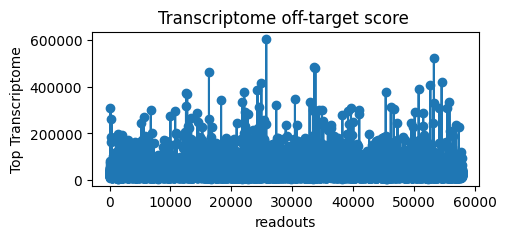

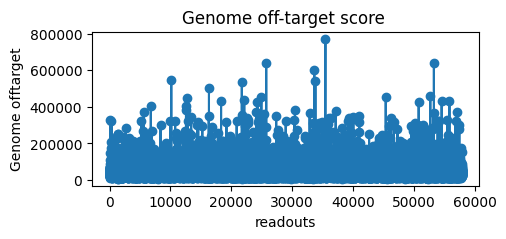

In [33]:
import LibraryDesigner as ld

folder = os.path.dirname(os.getcwd()) + os.sep + 'HumanGenomeTranscriptome'
ct_gn = ld.countTable(word=12,save_file=folder+ os.sep + r'hs1_12w.bin',
                   sparse=False)
ct_gn.load()


ct_tr = ld.countTable(word=12,save_file=folder+ os.sep + r'human__genesUnspliced_12w.bin',
                   sparse=False)
ct_tr.load()

offts = np.array([[ct.get(R)+ct.get(lt.seqrc(R)) for R in tqdm(lib_seqs)] for ct in [ct_tr,ct_gn]]).T

#print(np.any(offts>np.median(offts)*5))
import matplotlib.pylab as plt
plt.figure(figsize=(5,2))
plt.plot(offts[:,0],'o-')
plt.ylabel('Top Transcriptome')
plt.xlabel('readouts')
plt.title('Transcriptome off-target score ')
plt.figure(figsize=(5,2))
plt.plot(offts[:,1],'o-')
plt.ylabel('Genome offtarget')
plt.xlabel('readouts')
plt.title('Genome off-target score ')

#### Keep Encoding probes that have below 98th percentile off target score

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 56752/56752 [00:27<00:00, 2036.31it/s]


Text(0.5, 1.0, 'Genome off-target score ')

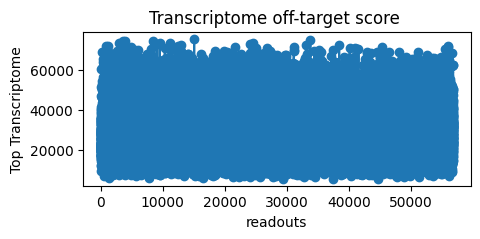

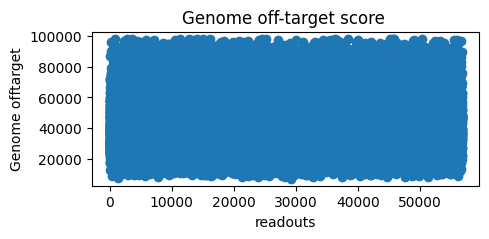

In [34]:
keep = offts[:,1]<np.percentile(offts[:,1],98)
lib_names,lib_seqs = np.array(lib_names)[keep],np.array(lib_seqs)[keep]

folder = os.path.dirname(os.getcwd()) + os.sep + 'HumanGenomeTranscriptome'
ct_gn = ld.countTable(word=12,save_file=folder+ os.sep + r'hs1_12w.bin',
                   sparse=False)
ct_gn.load()


ct_tr = ld.countTable(word=12,save_file=folder+ os.sep + r'human__genesUnspliced_12w.bin',
                   sparse=False)
ct_tr.load()

offts = np.array([[ct.get(R)+ct.get(lt.seqrc(R)) for R in tqdm(lib_seqs)] for ct in [ct_tr,ct_gn]]).T

#print(np.any(offts>np.median(offts)*5))
import matplotlib.pylab as plt
plt.figure(figsize=(5,2))
plt.plot(offts[:,0],'o-')
plt.ylabel('Top Transcriptome')
plt.xlabel('readouts')
plt.title('Transcriptome off-target score ')


plt.figure(figsize=(5,2))
plt.plot(offts[:,1],'o-')
plt.ylabel('Genome offtarget')
plt.xlabel('readouts')
plt.title('Genome off-target score ')

In [35]:
len(lib_seqs)

56752

#### Save the Final libray, the sequence will be in the upper-case

In [46]:
lt.fastawrite(os.path.dirname(os.getcwd()) + os.sep + 'design_outputs' + os.sep + 'human_Basalganglia_675gn_MERFISH_Panel_final_Filtered.fasta',lib_names,[sq.upper() for sq in lib_seqs])

In [3]:
# import shutil,glob,os
# ProbeRNA_fls = glob.glob(r'U:\Lab\MERFISH_and_MERSCOPE\Human_Basal_ganglia_Gene_Probe_design\design_outputs\ProbesRNA_Human500\*.csv')
# for fl in ProbeRNA_fls:
#     os.makedirs(os.path.dirname(fl.replace('ProbesRNA_Human500','ProbesRNA_Human500_csvOnly')), exist_ok = True)
#     shutil.copy(fl,fl.replace('ProbesRNA_Human500','ProbesRNA_Human500_csvOnly'))